**1. Exploring the Dataset:**
--

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [3]:
# a) first 10 rows of the dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
# b) how many rows and columns does the dataset have?

titanic.shape

# The data has 891 rows and 15 columns

(891, 15)

**2. Using .loc and iloc methods:**
--

In [7]:
# a) select the rows from index 5 to 15 and columns "age and "fare"

titanic.loc[5:15, "age":"fare"]

,age,sibsp,parch,fare
5,NaN,0,0,8.4583
6,54.0,0,0,51.8625
7,2.0,3,1,21.0750
8,27.0,0,2,11.1333
9,14.0,1,0,30.0708
10,4.0,1,1,16.7000
11,58.0,0,0,26.5500
12,20.0,0,0,8.0500
13,39.0,1,5,31.2750
14,14.0,0,0,7.8542


In [9]:
# b) select the first 5 rows and first 3 columns using the .iloc method

titanic.iloc[0:5, 0:3]

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [71]:
# c) find the age of the passenger at the 100th index using .iloc

titanic.iloc[100, 3]

28.0

In [72]:
titanic.loc[100, 'age']

28.0

**3. Using groupby( ) and aggregate( ) methods:**
--

In [21]:
# a) mean age for each gender

titanic.groupby('sex').aggregate(Mean = ('age', "mean"))


,Mean
sex,
female,27.915709
male,30.726645


In [31]:
# b) max and min age in each passenger class

titanic.groupby('class').aggregate(Minimum = ('age', "min"),
                                  Maximum = ('age', "max"))

,Minimum,Maximum
class,,
First,0.92,80.0
Second,0.67,70.0
Third,0.42,74.0


In [47]:
# c) group dataset by both 'sex' and 'class', and 
#find the total number of passengers and the average fare 
#for each group

titanic.groupby(['sex', 'class']).aggregate(Total_Passengers = ('pclass', "sum"),
                                           Average_Fare = ('fare', "mean"))


Total_Passengers  Average_Fare
sex    class                                 
female First                 94    106.125798
       Second               152     21.970121
       Third                432     16.118810
male   First                122     67.226127
       Second               216     19.741782
       Third               1041     12.661633

**4. Using Pivot Tables:**
--

In [61]:
# a) create a pivot table that shows the median age of passengers 
#for each combination of 'sex and 'class'

titanic.pivot_table('age', index = 'class', columns = 'sex', aggfunc = "median")

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


In [64]:
# b) create a pivot table that shows the total fare 
#collected for each combination of 'embark_town and 'deck'

td_pivot = titanic.pivot_table('fare', index = 'embark_town', columns = 'deck', aggfunc = "sum")
td_pivot

deck,A,B,C,D,E,F,G
embark_town,,,,,,,
Cherbourg,268.5042,3211.2084,2070.2332,968.1127,464.5292,22.3583,0.000
Queenstown,0.0000,0.0000,180.0000,0.0000,12.3500,7.7500,0.000
Southampton,325.8541,1963.5625,3658.6959,920.9583,995.9750,212.9500,54.325


<Axes: xlabel='deck', ylabel='embark_town'>

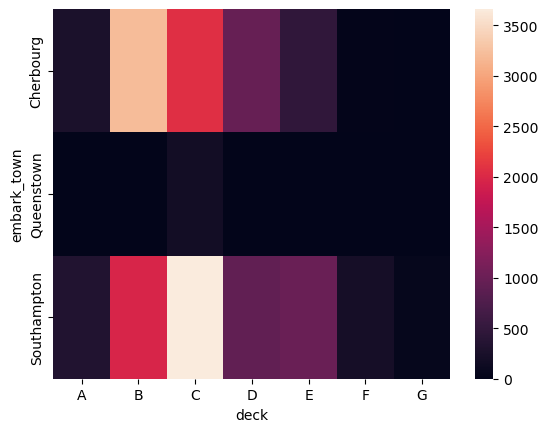

In [68]:
# c) plot a heatmap to visualize the results of any one of the above pivot tables

sns.heatmap(td_pivot)